Gráfico por región directorio de colegios (diferenciando entre distintas categorias de mensualidad
)

In [23]:
import os
import pandas as pd
import geopandas as gp
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Se limpia el dataframe con la información de directorio de colegios

In [24]:
ruta_df = os.path.join('directorio_colegios_y_documentacion', '20220914_Directorio_Oficial_EE_2022_20220430_WEB.csv')
df = pd.read_csv(ruta_df, sep = ';', decimal = ',')

df = df[df['LONGITUD'] != ' ']
df = df[df['LATITUD'] != ' ']
df['LONGITUD'] = df['LONGITUD'].str.replace(',', '.')
df['LATITUD'] = df['LATITUD'].str.replace(',', '.')
df = df[df['PAGO_MENSUAL'] != 'SIN INFORMACION']
df['LONGITUD'] = df['LONGITUD'].astype(np.float64)
df['LATITUD'] = df['LATITUD'].astype(np.float64)
df['MAT_TOTAL'] = df['MAT_TOTAL'].astype(np.float64)
df['MATRICULA'] = df['MATRICULA'].astype(np.float64)
df = df.dropna()
df = df.rename(columns = {'NOM_COM_RBD':'COMUNA'})
df = gp.GeoDataFrame(df, geometry=gp.points_from_xy(df['LONGITUD'], df['LATITUD']))
df

c:\Users\danie\anaconda3\envs\datascience\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_10,ENS_11,MAT_TOTAL,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,geometry
0,2022,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,0,0,667.0,1.0,1,2,,GRATUITO,GRATUITO,POINT (-70.29521 -18.48720)
1,2022,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,0,0,166.0,1.0,1,2,,GRATUITO,GRATUITO,POINT (-70.30276 -18.46986)
2,2022,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,62000660,1,15,AYP,151,...,0,0,376.0,1.0,1,1,,GRATUITO,GRATUITO,POINT (-70.26083 -18.50358)
3,2022,4,3,LICEO OCTAVIO PALMA PEREZ,,62000660,1,15,AYP,151,...,0,0,1014.0,1.0,1,1,,GRATUITO,GRATUITO,POINT (-70.30827 -18.47424)
4,2022,5,1,JOVINA NARANJO FERNANDEZ,,62000660,1,15,AYP,151,...,0,0,771.0,1.0,1,7,PLURALISTA,GRATUITO,GRATUITO,POINT (-70.31345 -18.47690)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16556,2022,42032,8,COLEGIO HUELLAS,,77257123,1,16,NUBLE,161,...,0,0,60.0,1.0,1,1,,MAS DE $100.000,MAS DE $100.000,POINT (-72.04645 -36.56393)
16566,2022,42042,5,ESCUELA HOSPITALARIA PUTAENDO,,65193679,1,5,VALPO,57,...,0,0,6.0,1.0,1,1,,GRATUITO,GRATUITO,POINT (-70.68808 -32.61895)
16569,2022,42048,4,ESCUELA ESPECIAL DE LENGUAJE GRANJERITOS,,65119714,1,7,MAULE,71,...,0,0,0.0,0.0,4,1,,GRATUITO,GRATUITO,POINT (-71.15360 -35.15130)
16577,2022,42064,6,JARDIN INFANTIL ARCOIRIS FLORENCIA,,77112362,1,5,VALPO,56,...,0,0,0.0,0.0,1,1,,MAS DE $100.000,MAS DE $100.000,POINT (-71.61107 -33.61766)


Se carga el geodataframe con comunas

In [25]:
ruta_comunas = os.path.join('mapa_comunas', 'COMUNAS_2020.SHP')
comunas = gp.read_file(ruta_comunas)
comunas['COMUNA'] = comunas['COMUNA'].astype('object')
#https://stackoverflow.com/questions/39512002/convert-whole-dataframe-from-lower-case-to-upper-case-with-pandas
comunas['COMUNA'] = comunas['COMUNA'].str.upper()
comunas
 


,CUT_REG,CUT_PROV,CUT_COM,REGION,PROVINCIA,COMUNA,SUPERFICIE,geometry
0,01,011,01101,Tarapacá,Iquique,IQUIQUE,2289.53,"MULTIPOLYGON (((-70.11528 -21.17792, -70.11540..."
1,01,011,01107,Tarapacá,Iquique,ALTO HOSPICIO,571.19,"POLYGON ((-69.92603 -20.25000, -69.96762 -20.3..."
2,01,014,01401,Tarapacá,Tamarugal,POZO ALMONTE,13765.80,"POLYGON ((-68.99185 -19.92108, -68.98991 -19.9..."
3,01,014,01402,Tarapacá,Tamarugal,CAMIÑA,2199.83,"POLYGON ((-69.39521 -19.06188, -69.39385 -19.0..."
4,01,014,01403,Tarapacá,Tamarugal,COLCHANE,4007.84,"POLYGON ((-68.65146 -19.77181, -68.65148 -19.7..."
...,...,...,...,...,...,...,...,...
340,08,081,08112,Biobío,Concepción,HUALPÉN,53.77,"MULTIPOLYGON (((-73.17486 -36.81466, -73.17491..."
341,08,081,08108,Biobío,Concepción,SAN PEDRO DE LA PAZ,112.86,"POLYGON ((-73.09146 -36.82367, -73.08958 -36.8..."
342,08,081,08105,Biobío,Concepción,HUALQUI,535.85,"POLYGON ((-72.92506 -36.89303, -72.92471 -36.8..."
343,12,121,12103,Magallanes y de la Antártica Chilena,Magallanes,RÍO VERDE,9147.57,"MULTIPOLYGON (((-72.49585 -53.54084, -72.49615..."


arreglar colores

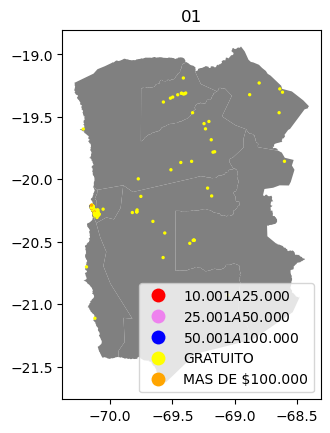

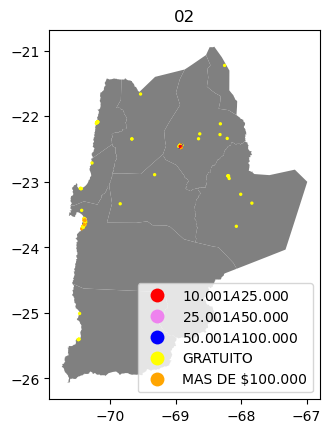

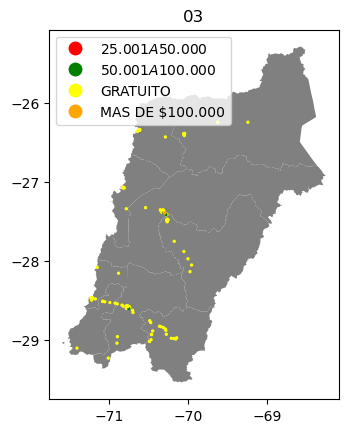

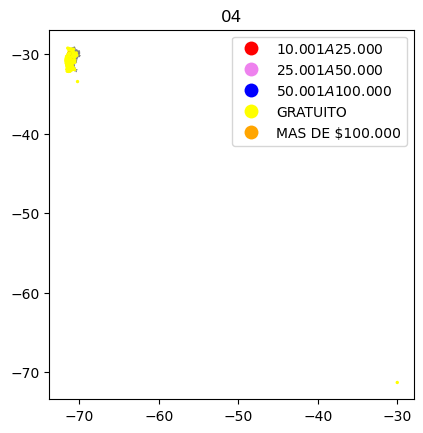

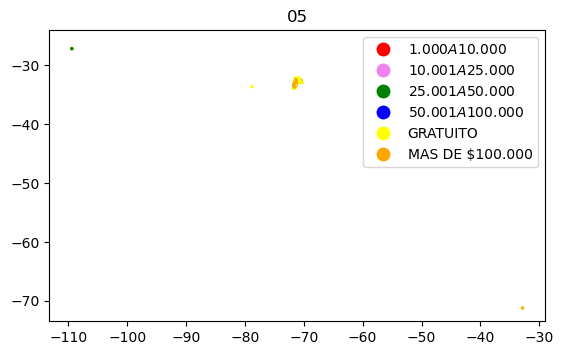

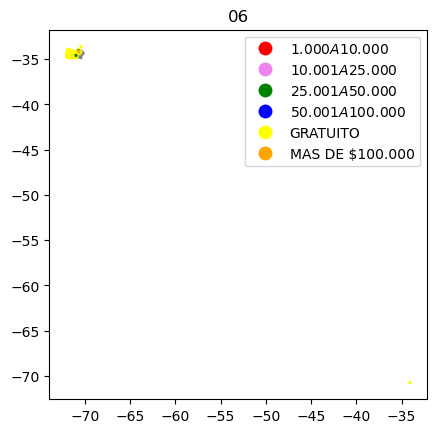

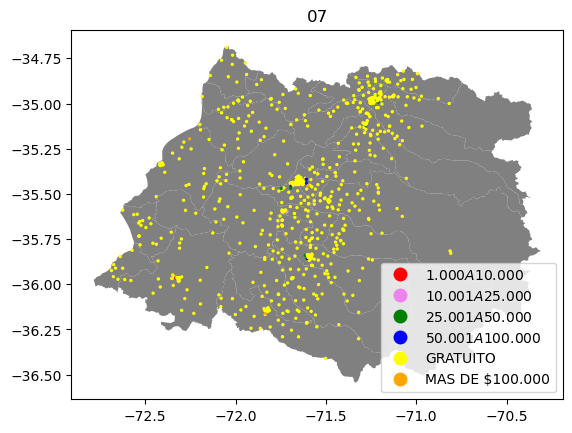

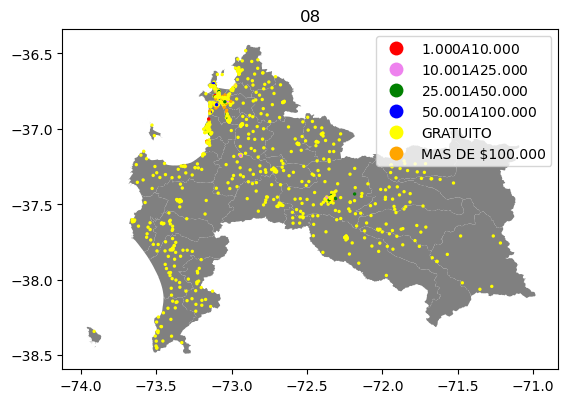

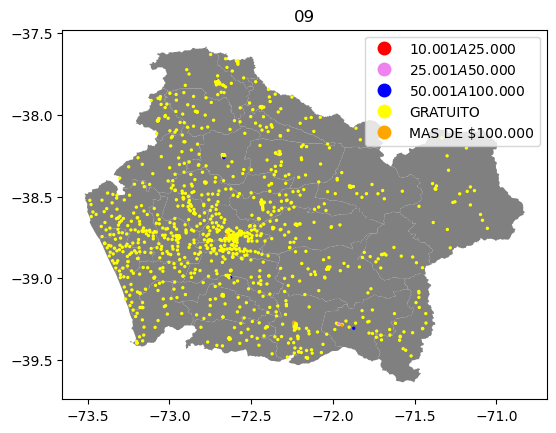

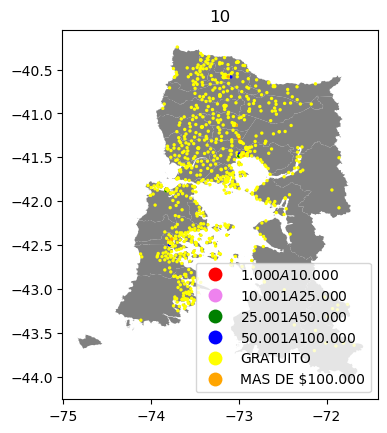

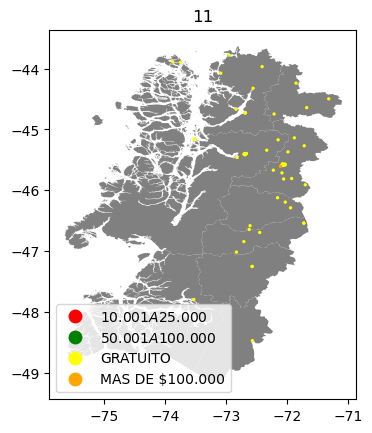

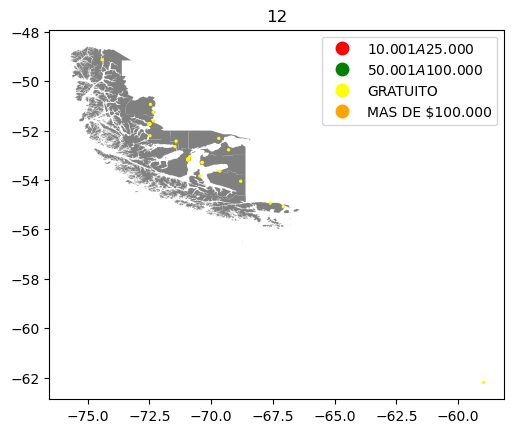

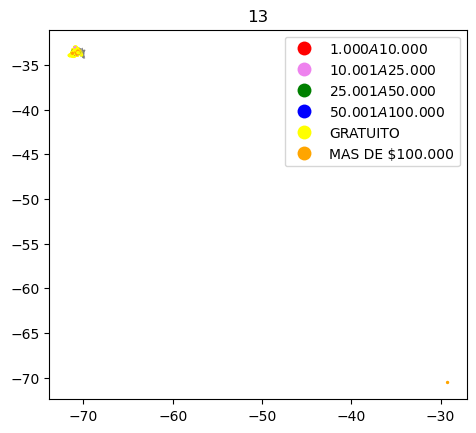

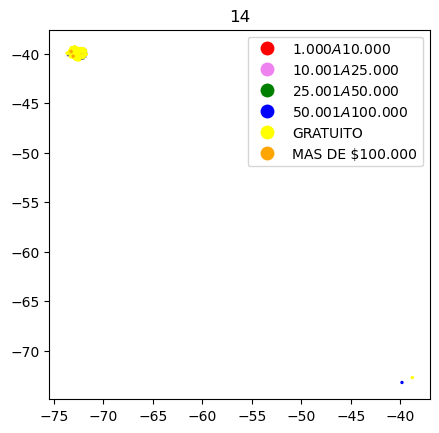

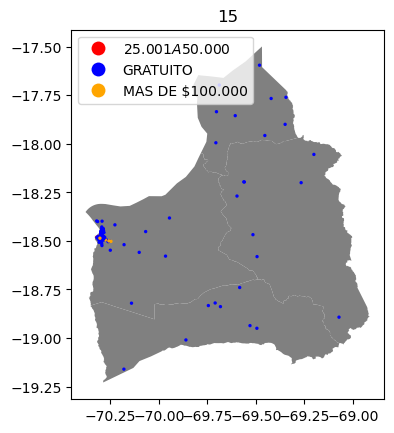

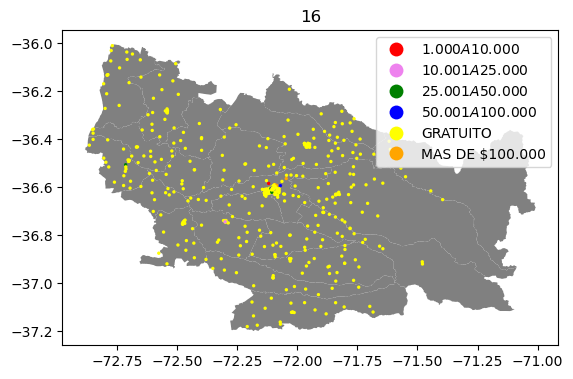

In [63]:
palette = {'GRATUITO': 'red', '$1.000 A $10.000': 'orange', '$10.001 A $25.000' : 'yellow', '$25.001 A $50.000' : 'green', '$50.001 A $100.000' : 'blue', 'MAS DE $100.000' : 'violet'}
cmap = mlt.colors.ListedColormap([palette[b] for b in df['PAGO_MENSUAL'].unique()])

for region in comunas['CUT_REG'].unique():
    fig, ax = plt.subplots()
    comunas[comunas['CUT_REG'] == region].plot(ax = ax, color = 'gray')
    df[df['COD_REG_RBD'] == int(region)].plot(column = 'PAGO_MENSUAL', categorical = True, ax = ax, legend = True, s = 2, cmap = cmap)
    plt.title(region)

